In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Classification
When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 *STANDARDIZED* feature differences. This data frame is for classification.

In [8]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:].values.ravel()

In [9]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 50), (2835,), (354, 50), (354,), (355, 50), (355,))

## SVM

In [16]:
parameters = {'kernel': ('linear', 'rbf'), 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': np.arange(1, 10)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'C': 7, 'gamma': 0.0001, 'kernel': 'rbf'}
0.5541446208112875
test score:0.5621468926553672
val score:0.5774647887323944


In [18]:
SVM_result=clf.cv_results_

In [38]:
tmp_score=pd.DataFrame(SVM_result['mean_test_score'])
tmp_attr=pd.DataFrame(SVM_result['params'])

In [54]:
SVM_score=pd.concat([tmp_score,tmp_attr],axis=1)
SVM_score.columns=['Score','C','gamma','kernel']
SVM_score=SVM_score.sort_values(by='Score',ascending=False)

In [55]:
SVM_score

,Score,C,gamma,kernel
69,0.554145,7,0.0001,rbf
59,0.553792,6,0.0001,rbf
79,0.553086,8,0.0001,rbf
49,0.552381,5,0.0001,rbf
39,0.552028,4,0.0001,rbf
...,...,...,...,...
81,0.450441,9,1.0000,rbf
61,0.450441,7,1.0000,rbf
21,0.450441,3,1.0000,rbf
71,0.450441,8,1.0000,rbf


more refine with fixed kernel

In [74]:
parameters = {'kernel': ['rbf'], 'gamma': [0.0001,0.00001,0.000001], 'C': np.arange(1, 10)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'C': 7, 'gamma': 0.0001, 'kernel': 'rbf'}
0.5541446208112875
test score:0.5621468926553672
val score:0.5774647887323944


### optimal parameter for SVM classifier
> 'C': 7, 'gamma': 0.0001, 'kernel': 'rbf'

test score:0.56
val score:0.57

## SGD classifier

In [56]:
parameters = {'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],'max_iter':[500, 1000, 1500, 2000, 2500, 3000]}
svc = SGDClassifier()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'loss': 'hinge', 'max_iter': 2500}
0.5178130511463845
test score:0.5084745762711864
val score:0.504225352112676


In [57]:
SGD_result=clf.cv_results_

In [58]:
SGD_result

{'mean_fit_time': array([0.04657016, 0.04790359, 0.04653454, 0.04534016, 0.05208573,
        0.04828176, 0.06549859, 0.0649354 , 0.06655421, 0.07005467,
        0.06573906, 0.06637435, 0.05401974, 0.0549511 , 0.05217109,
        0.05947337, 0.05278435, 0.05589805, 0.04504905, 0.05192137,
        0.06072502, 0.05273027, 0.04371166, 0.04225407, 0.04774833,
        0.04566865, 0.04479065, 0.04643216, 0.04516473, 0.04904084,
        0.09585299, 0.09775386, 0.10857973, 0.10312271, 0.08956218,
        0.08989706, 0.03339806, 0.03314543, 0.03145885, 0.03165965,
        0.03286886, 0.03487067, 0.1069818 , 0.09043384, 0.09237661,
        0.08668704, 0.08226018, 0.09150434, 0.13087816, 0.12944274,
        0.1207067 , 0.12655139, 0.13280582, 0.14331365]),
 'std_fit_time': array([0.00634389, 0.01058731, 0.0081599 , 0.00489757, 0.00861178,
        0.00340617, 0.00385678, 0.00920806, 0.00482274, 0.01136555,
        0.00953257, 0.00462567, 0.00722481, 0.00530628, 0.01263617,
        0.01111073, 0.011

In [62]:
tmp_score=pd.DataFrame(SGD_result['mean_test_score'])
tmp_attr=pd.DataFrame(SGD_result['params'])

In [70]:
SGD_score=pd.concat([tmp_score,tmp_attr],axis=1)
SGD_score.columns=['Score','loss','max_iter']
SGD_score=SGD_score.sort_values(by='Score',ascending=False)

In [71]:
SGD_score

,Score,loss,max_iter
4,0.517813,hinge,2500
6,0.506173,log_loss,500
37,0.503704,huber,1000
2,0.500529,hinge,1500
10,0.500176,log_loss,2500
36,0.500176,huber,500
0,0.497707,hinge,500
40,0.496649,huber,2500
38,0.495944,huber,1500
8,0.493122,log_loss,1500


more refine with fixed loss function(hinge)

In [78]:
parameters = {'loss':['hinge'],'max_iter':np.arange(2000,6000,step=500),'random_state':np.arange(0,10)}
svc = SGDClassifier()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'loss': 'hinge', 'max_iter': 2000, 'random_state': 5}
0.508994708994709
test score:0.5338983050847458
val score:0.5774647887323944


### optimal parameter for SGD classifier
> 'loss': 'hinge', 'max_iter': 2000

test score:0.53
val score:0.57

## Decision Tree

In [22]:
parameters = {'random_state':np.arange(0,10),'max_depth':np.arange(0,10)}
TREE = tree.DecisionTreeClassifier()
clf = GridSearchCV(TREE, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'max_depth': 2, 'random_state': 0}
0.528747795414462
test score:0.5649717514124294
val score:0.5211267605633803


/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 238, in fit
    check_scalar(
  File "/Users/hokuma/miniconda/lib/python3.9/si

### visualize decision tree

In [24]:
clf=tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names = y_train,
                feature_names = X.columns, impurity=True, filled=True)

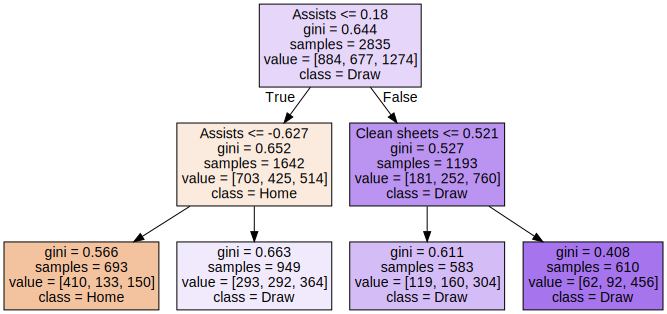

In [25]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

# Classfication with feature selection

In [76]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:].values.ravel()

## Feature Selection with Tree

Feature ranking:
1. feature Clean sheets (0.047)
2. feature Assists (0.035)
3. feature Goals (0.031)
4. feature Big Chances Created (0.030)
5. feature Passes (0.030)
6. feature Blocked shots (0.026)
7. feature Goals Conceded (0.023)
8. feature Goals with right foot (0.023)
9. feature Shots on target (0.023)
10. feature Goals with left foot (0.021)
11. feature Big chances missed (0.021)
12. feature Hit woodwork (0.020)
13. feature Own goals (0.020)
14. feature Through balls (0.020)
15. feature Shots (0.020)
16. feature Accurate long balls (0.019)
17. feature Sweeper clearances (0.019)
18. feature Clearances off line (0.019)
19. feature Crosses (0.019)
20. feature Penalties scored (0.019)
21. feature Tackle success % (0.019)
22. feature Cross accuracy % (0.018)
23. feature Successful 50/50s (0.018)
24. feature Catches (0.018)
25. feature Freekicks scored (0.018)
26. feature Offsides (0.018)
27. feature Tackles (0.018)
28. feature Last man tackles (0.018)
29. feature Penalties Saved (0.01

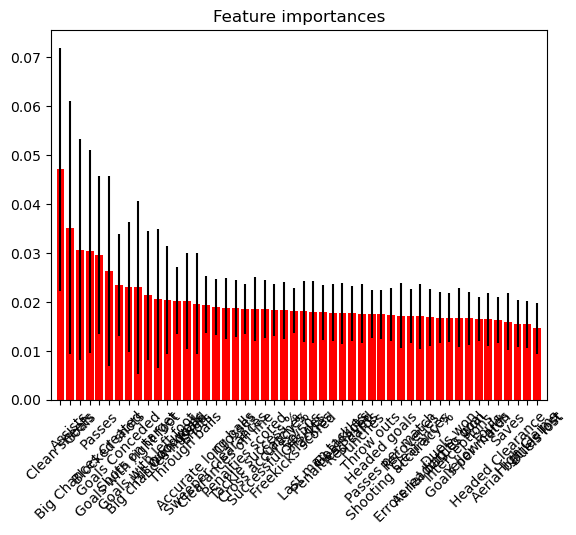

In [77]:
forest=RandomForestClassifier()
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [78]:
X=X.drop(columns=X.columns[indices[13:]])

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 13), (2835,), (354, 13), (354,), (355, 13), (355,))

## SVM

In [38]:
parameters = {'kernel': ('linear', 'rbf'), 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': np.arange(1, 10)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'C': 9, 'gamma': 0.01, 'kernel': 'rbf'}
0.5527336860670194
test score:0.5254237288135594
val score:0.6


In [39]:
SVM_result=clf.cv_results_

In [40]:
tmp_score=pd.DataFrame(SVM_result['mean_test_score'])
tmp_attr=pd.DataFrame(SVM_result['params'])

In [41]:
SVM_score=pd.concat([tmp_score,tmp_attr],axis=1)
SVM_score.columns=['Score','C','gamma','kernel']
SVM_score=SVM_score.sort_values(by='Score',ascending=False)

In [42]:
SVM_score

,Score,C,gamma,kernel
85,0.552734,9,0.01,rbf
65,0.552734,7,0.01,rbf
75,0.552381,8,0.01,rbf
55,0.552028,6,0.01,rbf
45,0.551675,5,0.01,rbf
...,...,...,...,...
41,0.476896,5,1.00,rbf
21,0.475485,3,1.00,rbf
61,0.475485,7,1.00,rbf
71,0.474780,8,1.00,rbf


more refine with fixed kernel

In [45]:
parameters = {'kernel': ['rbf'], 'gamma': [0.01,0.001,0.0001], 'C': np.arange(1, 20)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'C': 14, 'gamma': 0.01, 'kernel': 'rbf'}
0.5541446208112875
test score:0.5310734463276836
val score:0.6


### optimal parameter for SVM classifier
> 'C': 14, 'gamma': 0.01, 'kernel': 'rbf'

test score:0.53
val score:0.6

## SGD classifier

In [46]:
parameters = {'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],'max_iter':[500, 1000, 1500, 2000, 2500, 3000]}
svc = SGDClassifier()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'loss': 'hinge', 'max_iter': 500}
0.5428571428571429
test score:0.5310734463276836
val score:0.5859154929577465


In [49]:
SGD_result=clf.cv_results_
tmp_score=pd.DataFrame(SGD_result['mean_test_score'])
tmp_attr=pd.DataFrame(SGD_result['params'])

In [50]:
SGD_score=pd.concat([tmp_score,tmp_attr],axis=1)
SGD_score.columns=['Score','loss','max_iter']
SGD_score=SGD_score.sort_values(by='Score',ascending=False)

In [51]:
SGD_score

,Score,loss,max_iter
0,0.542857,hinge,500
41,0.539683,huber,3000
10,0.539683,log_loss,2500
8,0.536508,log_loss,1500
37,0.534744,huber,1000
9,0.530511,log_loss,2000
1,0.528395,hinge,1000
6,0.527690,log_loss,500
36,0.526631,huber,500
38,0.523810,huber,1500


more refine with fixed loss function(hinge)

In [53]:
parameters = {'loss':['hinge'],'max_iter':np.arange(500,6000,step=500)}
svc = SGDClassifier()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'loss': 'hinge', 'max_iter': 2000}
0.5432098765432098
test score:0.4180790960451977
val score:0.39154929577464787


### optimal parameter for SGD classifier
> 'loss': 'hinge', 'max_iter': 2000

test score:0.41
val score:0.39

## Decision Tree

In [83]:
parameters = {'random_state':np.arange(0,10),'max_depth':np.arange(4,10)}
TREE = tree.DecisionTreeClassifier()
clf = GridSearchCV(TREE, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print("test score:"+ str(clf.score(X_test,y_test)))
print("val score:"+str(clf.score(X_val,y_val)))

{'max_depth': 4, 'random_state': 0}
0.5350970017636684
test score:0.4915254237288136
val score:0.5521126760563381


### visualize decision tree

In [87]:
clf=tree.DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names = y_train,
                feature_names = X.columns, impurity=True, filled=True)

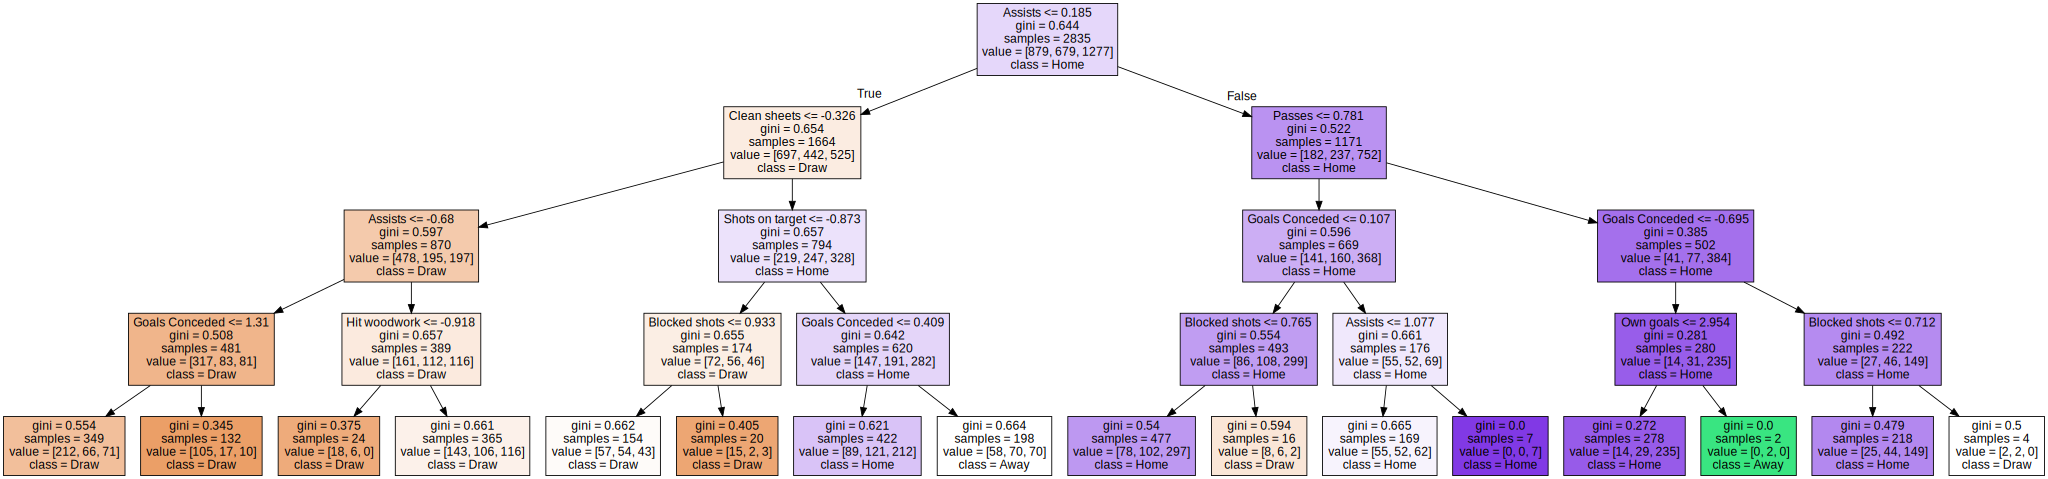

In [88]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

### optimal parameter for Tree classifier
> 'max_depth': 4

test score:0.49
val score:0.55

# Regression

## Logistic Regression

In [26]:
parameters={'max_iter':[500, 1000, 1500, 2000, 2500, 3000]}
 = LogisticRegression()
clf.max_iter=500
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [27]:
clf.score(X_test,y_test)

0.519774011299435

In [28]:
clf.score(X_val,y_val)

0.5492957746478874